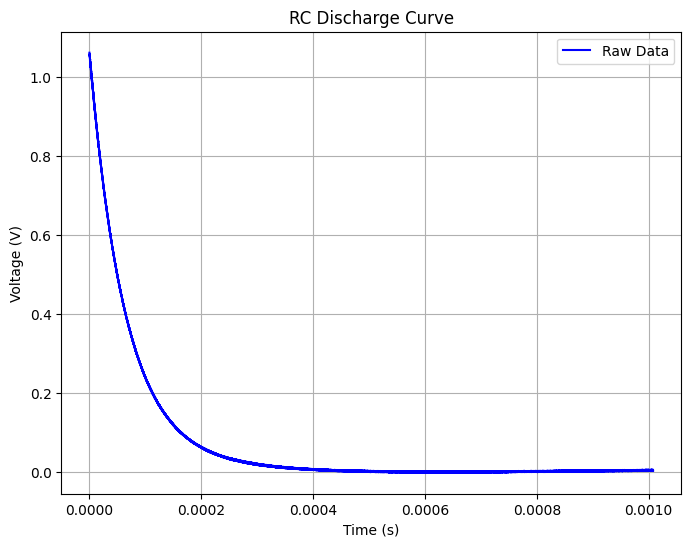

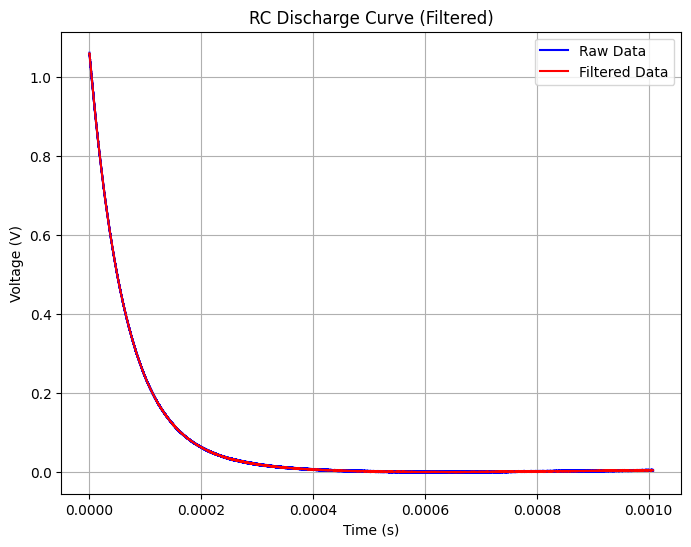

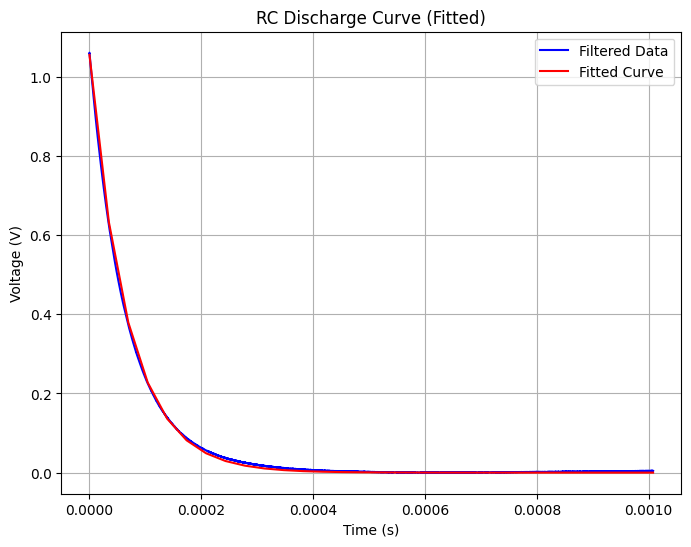

Fitted Parameters: a = 1.056, b = 14730.538
Time Constant (tau) = 0.068 ms,thery=0.06ms


In [16]:
#C=1uF,R=10ohm,R_gen=50ohm
#U = U_C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

# 读取CSV文件
data = pd.read_csv('RC_release1.csv')  
data = data[data['in s'] > 0]
# 提取时间和电压数据
time = data['in s'].values
voltage = data['C1 in V'].values

# 绘制原始数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, 'b-', label='Raw Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RC Discharge Curve')
plt.legend()
plt.grid(True)
plt.show()

# 使用Savitzky-Golay滤波器平滑数据
filtered_voltage = savgol_filter(voltage, window_length=51, polyorder=3)

# 绘制滤波后的数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, 'b-', label='Raw Data')
plt.plot(time, filtered_voltage, 'r-', label='Filtered Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RC Discharge Curve (Filtered)')
plt.legend()
plt.grid(True)
plt.show()

# 定义指数衰减函数
def exp_decay(t, a, b):
    return a * np.exp(-b * t)

# 选取部分数据进行拟合
list=np.linspace(0, len(time)-1, 30, dtype=int)
fit_time = time[list]
fit_voltage = filtered_voltage[list]

# 拟合数据
popt, pcov = curve_fit(exp_decay, fit_time, fit_voltage)
a, b = popt
tau=1/b

# 绘制拟合曲线
plt.figure(figsize=(8, 6))
plt.plot(time, filtered_voltage, 'b-', label='Filtered Data')
plt.plot(fit_time, exp_decay(fit_time, a, b), 'r-', label='Fitted Curve')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RC Discharge Curve (Fitted)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted Parameters: a = {a:.3f}, b = {b:.3f}")
print(f"Time Constant (tau) = {(tau*1000):.3f} ms,thery=0.06ms")




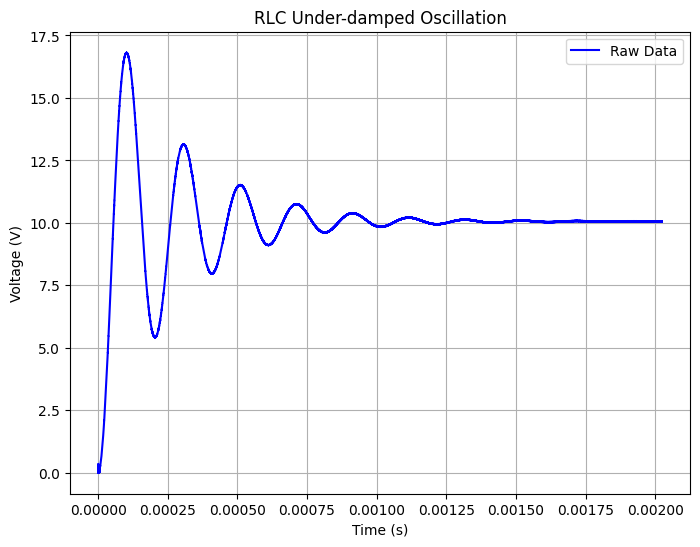

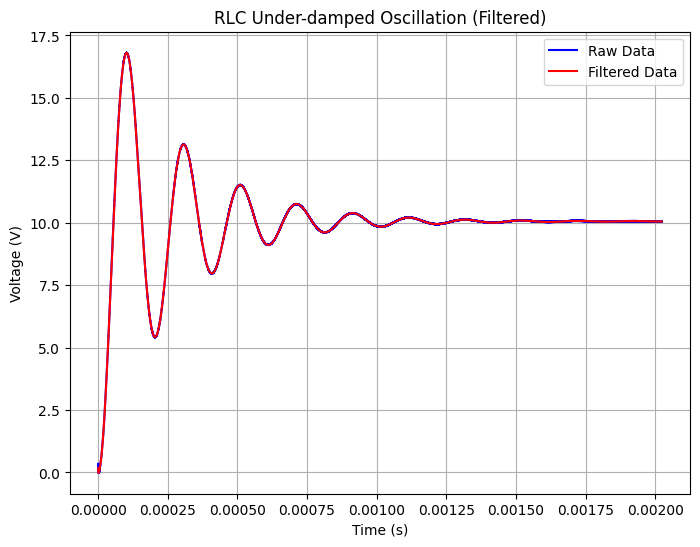

In [12]:
#C=0.1uf,L=10mH,R_gen=50ohm,R=1ohm
#U = U_C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

# 读取CSV文件
data = pd.read_csv('RLC.csv')  
data = data[data['in s'] > 0]
# 提取时间和电压数据
time = data['in s'].values
voltage = data['C1 in V'].values

# 绘制原始数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, 'b-', label='Raw Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RLC Under-damped Oscillation')
plt.legend()
plt.grid(True)
plt.show()

# 使用Savitzky-Golay滤波器平滑数据
filtered_voltage = savgol_filter(voltage, window_length=51, polyorder=3)

# 绘制滤波后的数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, 'b-', label='Raw Data')
plt.plot(time, filtered_voltage, 'r-', label='Filtered Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RLC Under-damped Oscillation (Filtered)')
plt.legend()
plt.grid(True)
plt.show()





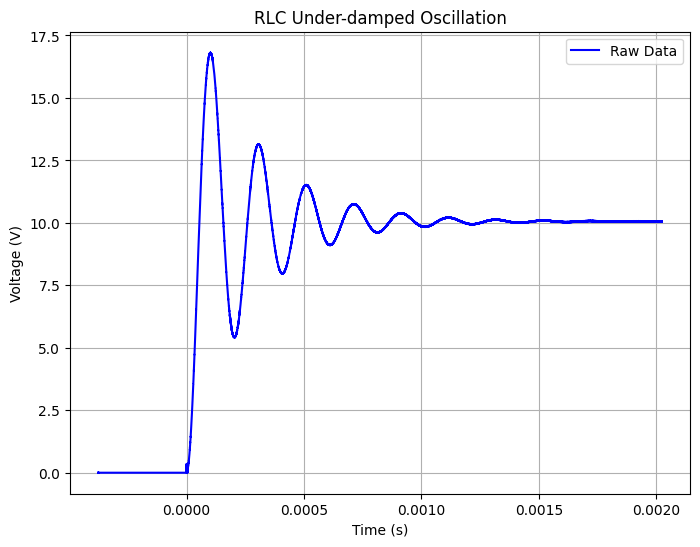

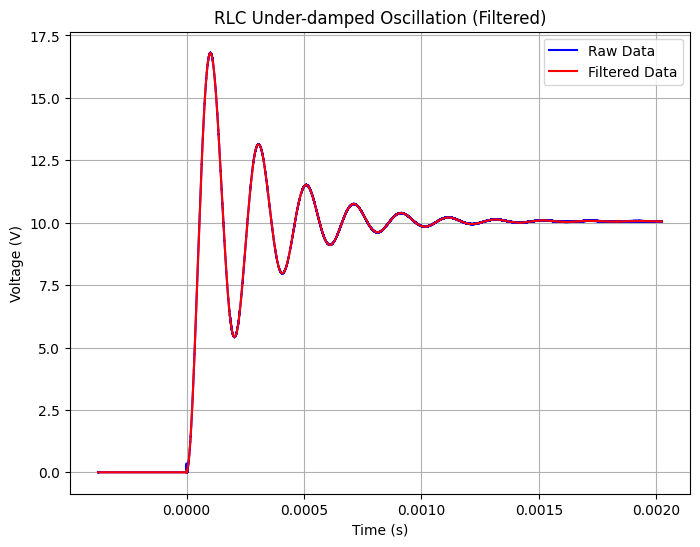

Natural Frequency (f0) = 6361918.079 Hz
Quality Factor (Q) = 9.139


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter, find_peaks

# 读取CSV文件
data = pd.read_csv('RLC.csv')  

# 提取时间和电压数据
time = data['in s'].values
voltage = data['C1 in V'].values

# 绘制原始数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, 'b-', label='Raw Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RLC Under-damped Oscillation')
plt.legend()
plt.grid(True)
plt.show()

# 使用Savitzky-Golay滤波器平滑数据
filtered_voltage = savgol_filter(voltage, window_length=51, polyorder=3)

# 绘制滤波后的数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, 'b-', label='Raw Data')
plt.plot(time, filtered_voltage, 'r-', label='Filtered Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RLC Under-damped Oscillation (Filtered)')
plt.legend()
plt.grid(True)
plt.show()

# 找到滤波后数据的峰值和谷值
peaks, _ = find_peaks(filtered_voltage)
valleys, _ = find_peaks(-filtered_voltage)

# 计算相邻峰值之间的时间差
peak_times = time[peaks]
periods = np.diff(peak_times)
avg_period = np.mean(periods)

# 计算固有频率
f0 = 1 / avg_period

# 计算相邻峰-谷值的幅度差
peak_values = filtered_voltage[peaks]
valley_values = filtered_voltage[valleys]
amplitudes = peak_values[:len(valley_values)] - valley_values

# 拟合幅度差的指数衰减
from scipy.optimize import curve_fit

def exp_decay(x, a, alpha):
    return a * np.exp(-alpha * x)

xdata = np.arange(len(amplitudes))
popt, pcov = curve_fit(exp_decay, xdata, amplitudes)
a, alpha = popt

# 计算品质因数
Q = np.pi / alpha

print(f"Natural Frequency (f0) = {f0:.3f} Hz")
print(f"Quality Factor (Q) = {Q:.3f}")

In [ ]:
#R=10ohm,L=10mH,R_L=13.8ohm,R_gen=50ohm
#U = U_R

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

# 读取CSV文件
data = pd.read_csv('RL1.csv')  
data = data[data['in s'] > 0]
# 提取时间和电压数据
time = data['in s'].values
voltage = data['C1 in V'].values

# 绘制原始数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, 'b-', label='Raw Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage on R (V)')
plt.title('RL Discharge Curve')
plt.legend()
plt.grid(True)
plt.show()

# 使用Savitzky-Golay滤波器平滑数据
filtered_voltage = savgol_filter(voltage, window_length=51, polyorder=3)

# 绘制滤波后的数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, 'b-', label='Raw Data')
plt.plot(time, filtered_voltage, 'r-', label='Filtered Data')
plt.xlabel('Time (s)')
plt.ylabel('Voltage on R(V)')
plt.title('RL Discharge Curve (Fitted)')
plt.legend()
plt.grid(True)
plt.show()

# 定义指数衰减函数
def exp_decay(t, a, b):
    return a * np.exp(-b * t)

# 选取部分数据进行拟合
list=np.linspace(0, len(time)-1, 30, dtype=int)
fit_time = time[list]
fit_voltage = filtered_voltage[list]

# 拟合数据
popt, pcov = curve_fit(exp_decay, fit_time, fit_voltage)
a, b = popt


# 绘制拟合曲线
plt.figure(figsize=(8, 6))
plt.plot(time, filtered_voltage, 'b-', label='Filtered Data')
plt.plot(fit_time, exp_decay(fit_time, a, b), 'r-', label='Fitted Curve')
plt.xlabel('Time (s)')
plt.ylabel('Voltage on R (V)')
plt.title('RL Discharge Curve (Fitted)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted Parameters: a = {a:.3f}, b = {b:.3f}")
print(f"Time Constant (tau) = ",1000*tau," ms")


